In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [27]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data[:, :] 
y = iris.target
y = np.reshape(y, (y.shape[0],1))

In [42]:
#iris
#X
#y

In [28]:
from sklearn.model_selection import train_test_split


In [36]:
seed = 7
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [37]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


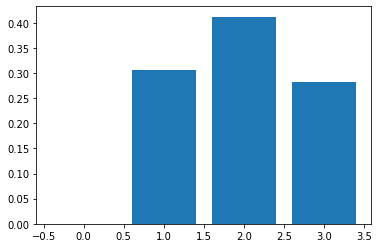

In [38]:
from matplotlib import pyplot
import xgboost as xgb
model1 = xgb.XGBClassifier(learning_rate = 0.05,
n_estimators = 100,
max_depth = 1,
subsample = 1,
gamma = 5)
eval_set = [(X_test, y_test)]
train_model1 = model1.fit(X_train, y_train)
importance = train_model1.feature_importances_
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [39]:
train_model1.get_booster().get_score(importance_type='weight')

{'f1': 1, 'f2': 96, 'f3': 32}

In [40]:
from sklearn.metrics import classification_report
pred1 = train_model1.predict(X_test)
print(classification_report(y_test, pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.92      0.75      0.83        16
           2       0.80      0.94      0.86        17

    accuracy                           0.89        45
   macro avg       0.91      0.90      0.90        45
weighted avg       0.90      0.89      0.89        45



In [41]:
from sklearn.metrics import accuracy_score  
predictions = [round(value) for value in pred1]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 88.89%
